## Import Statements

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Handling Money and Sales, so money formatting is more appropriate for certain values
For this, I created a formatting method for currency

In [ ]:
def money_format(x):
    return "$"+('%.2f' % x).rstrip('0').rstrip('.')

Loading the dataframe from the csv/excel file into a variable called *data*

## Reading in transactions data

In [ ]:
data = pd.read_csv('datasets/shopify_data.csv')

***
I want to first verify that that there the entire dataframe is filled and NA/NaN values are not present.

For this, I use the *.info()* method on my dataframe

In [91]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
order_id          5000 non-null int64
shop_id           5000 non-null int64
user_id           5000 non-null int64
order_amount      5000 non-null int64
total_items       5000 non-null int64
payment_method    5000 non-null object
created_at        5000 non-null object
dtypes: int64(5), object(2)
memory usage: 273.5+ KB
None


***
# How did the wrong Average Order Value (AOV) value come into play?

In [62]:
print("Incorrect AOV:",money_format(data['order_amount'].mean()))

Incorrect AOV: $3145.13


***
## Moving Forward to get a more appropriate AOV...
First, lets confirm that there are indeed 100 different shops

In [90]:
list_of_shops = data['shop_id'].unique()

Now, I will find the total number of items bought for the total amount of money paid. 
To do this, I will break each order into items and populate a list

In [85]:
list_of_items = []

for shop_id_num in list_of_shops:    
    #print(data[data["shop_id"] == shop_id_num][['order_amount','total_items']].sum())

    total_item_count = data[data["shop_id"] == shop_id_num]['total_items'].sum()
    average_cost = data[data["shop_id"] == shop_id_num]['order_amount'].sum()/total_item_count
    #print(average_cost)
    for x in range(total_item_count):
        list_of_items.append(average_cost)

In [86]:
#print(list_of_items)

In [87]:
print("Median cost per item:",money_format(np.median(np.array(list_of_items))))

Median cost per item: $352


In [88]:
print("Average cost per item based on total cost of all items:",money_format(np.mean(np.array(list_of_items))))

Average cost per item based on total cost of all items: $357.92


# Plotting my data to see how it looks

## Histogram of cost of each item purchased, regardless of how many transactions were required to acquire every pair of sneakers

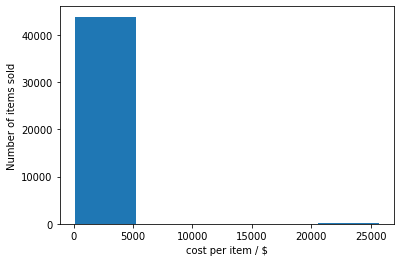

[   90.  5217. 10344. 15471. 20598. 25725.]
[43848.     0.     0.     0.    88.]


In [125]:
counts1, edges1, plot = plt.hist(np.array(list_of_items), bins = 5)
plt.xlabel('cost per item / $')
plt.ylabel('Number of items sold')
plt.show()
print(edges1)
print(counts1)

There is clearly something skewing this data, so I should look out for why we have such extremes in pricing

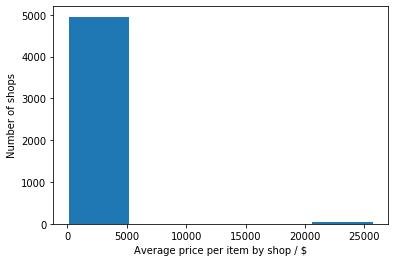

[   90.  5217. 10344. 15471. 20598. 25725.]
[4954.    0.    0.    0.   46.]


In [132]:
#Finding values greater than the average. Average cost is greater than the median cost

data['average_cost_per_item'] = data['order_amount']/data['total_items']
data.sort_values(by = 'average_cost_per_item')
counts2, edges2, plot = plt.hist(data['average_cost_per_item'], bins = 5)
plt.xlabel('Average price per item by shop / $')
plt.ylabel('Number of shops')
plt.show()
print(edges2)
print(counts2)

# THIS IS SHOWING THAT THERE IS A STORE OR A FEW STORES THAT ARE CHARGING A VERY HIGH PRICE FOR SNEAKERS ON AVERAGE
## 88 PAIRS OF SNEAKERS SOLD IN 46 TRANSACTIONS
***
## Comparing the size of bins shows that the each transaction does not equate to a single item purchased

In [121]:
print(edges1 == edges2)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True]


In [122]:
print(counts1 == counts2)

[False  True  True  True  True  True  True  True  True  True  True  True
 False]


In [134]:
print(data['average_cost_per_item'].unique())

[  158.    94.   148.   128.   142.   187.   112.   132.   118.   184.
   201.   160.   116.   153.   156.   176.   163.   127.   146.   140.
   130.   169.   164.   129.   101.   173.   122.   190.   134.   161.
   352.   181.   144.   166.   145.   117.   193.   133.   171.   147.
   138.   178.   177.   136.   154.   131.   165.   155. 25725.   172.
   149.   196.    90.   114.   168.   162.   195.   111.]


[158. 158. 158. ... 111. 111. 111.]
94


array([ 42,  55,  42,  40, 124,  59,  58,  77, 118,  50,  52,  93, 142,
       150,  97,  46, 151,  86, 105,  59,  55, 197,  39,  92,  89,  53,
       101,  52, 256,  54,  42, 197,  94, 206, 101,  48, 122, 161,  58,
        43,  39,  54,  48,  35,  99, 152, 148, 109, 112,  49, 105,  35,
        44,  54,  61,  53,  51,  46], dtype=int64)